# Algerian Forest Fires: How different weather conditions induce forest fires

# Introduction

Forest fires - a particular subtype of wildfires- are uncontrolled fires caused by nature or humans which endanger wildlife and disrupt the ecosystem. Located on the Mediterranean coast, Algeria has a hot and dry climate which increases the rate of evaporation, leaving plants drier than usual. Consequently, the occurrence of forest fires increases. It is thus primordial to combat this environmental issue to prevent global warming and further decimation of Algerian forests. By observing the dataset of the Bejaia region in Algeria, can we use the climate measurements to predict whether a future forest fire will occur in Bejaia? To make this prediction, we will use the Algerian Forest Fires dataset that contains numerical data on relative humidity, wind speed, rain, and temperature and use these variables as predictors to foresee the possible occurrence of forest fires in the Bejaia region in order to take the necessary precautions to prevent the fire propagation and protect the ecosystem.

The issue of climate change is causing changes in weather conditions that have the potential of inducing forest fires around the world. Our particular data set will be focusing on the city of Bejaia in Algeria, which includes the Gouraya National Park. This park is listed under the UNESCO Biosphere Reserve and is home to several endangered and protected species such as the Barbary macaque and the prickly juniper. The repeated exposures to fires is leading to a decreased regenerative capacity of the forest. Since the climate of Algeria is already considered harsh and dry, if weather conditions become more extreme, this could lead to an increased probability of forest fires. In our proposal, we aim to evaluate the predictive value of certain weather conditions (rain, temperature, relative humidity, wind speed) and how well they predict the occurrence of forest fires. 


# Preliminary Exploratory Data Analysis

- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- **Using only training data**, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- **Using only training data**, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


### Loading packages

In [5]:
library(dplyr)
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)

### Reading the .csv file from the web and tidying the data

In [6]:
algerian_fire_0 <- read.csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"), skip = 1)

# set up the right labels
algerian_fire <- algerian_fire_0 %>% 
                 select(day, month, year, Classes,Temperature, RH, Ws, Rain) %>%
                 mutate(Temperature = as.numeric(Temperature)) %>%
                 mutate(RH = as.numeric(RH)) %>%
                 mutate(Ws = as.numeric(Ws)) %>%
                 mutate(Rain = as.numeric(Rain)) 

# combine three columns and set it as date
algerian_fire$date <- as.Date(with(algerian_fire, paste(year, month, day, sep="-")), "%Y-%m-%d") 

# tidy data for the whole dataset
tidy_al <- algerian_fire %>% select(date, Classes,Temperature, RH, Ws, Rain) #tidy data for the whole dataset

Warning message:
“Problem with `mutate()` input `Temperature`.
ℹ NAs introduced by coercion
ℹ Input `Temperature` is `as.numeric(Temperature)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `RH`.
ℹ NAs introduced by coercion
ℹ Input `RH` is `as.numeric(RH)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `Ws`.
ℹ NAs introduced by coercion
ℹ Input `Ws` is `as.numeric(Ws)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `Rain`.
ℹ NAs introduced by coercion
ℹ Input `Rain` is `as.numeric(Rain)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


### Creating the training dataset

In [7]:
bejaia_fire <- tidy_al[c(1:122),] # select data for bejaia region
bejaia_fire$Classes <- trimws(bejaia_fire$Classes) # remove space before and after the string
bejaia_fire <- bejaia_fire %>% mutate(Classes = as.factor(Classes)) # set the label back to factor
bejaia_split <- initial_split(bejaia_fire, prop = 0.8, strata = Classes)
bejaia_train <- training(bejaia_split) # split and get training dataset

### Creating a table for the mean of predictors

In [8]:
mean_of_variable <- bejaia_train %>% 
                    select(Temperature, RH, Ws, Rain) %>%
                    map_df(mean, na.rm=FALSE)
mean_of_variable

Temperature,RH,Ws,Rain
<dbl>,<dbl>,<dbl>,<dbl>
31.20202,68.24242,16.08081,0.8828283


### Creating a table for the number of observations for each class

In [9]:
bejaia_table <- bejaia_train %>%
                group_by(Classes)%>%
                summarize(n = n())
bejaia_table

`summarise()` ungrouping output (override with `.groups` argument)



Classes,n
<fct>,<int>
fire,48
not fire,51


### Baking the training data for the visualization

In [10]:
bejaia_recipe <- recipe(Classes ~ Temperature + RH + Ws + Rain, data = bejaia_train) %>% 
                 step_center(all_predictors()) %>%
                 step_scale(all_predictors())
bejaia_scaled <- bejaia_recipe %>%  
                 prep() %>%
                 bake(bejaia_train)

### The visualization

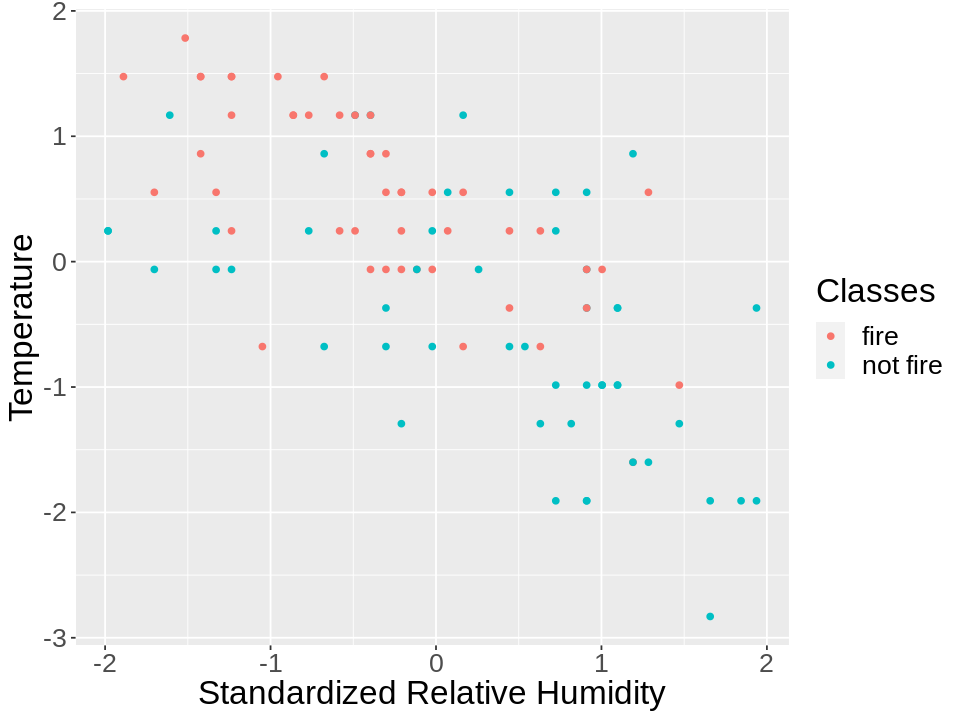

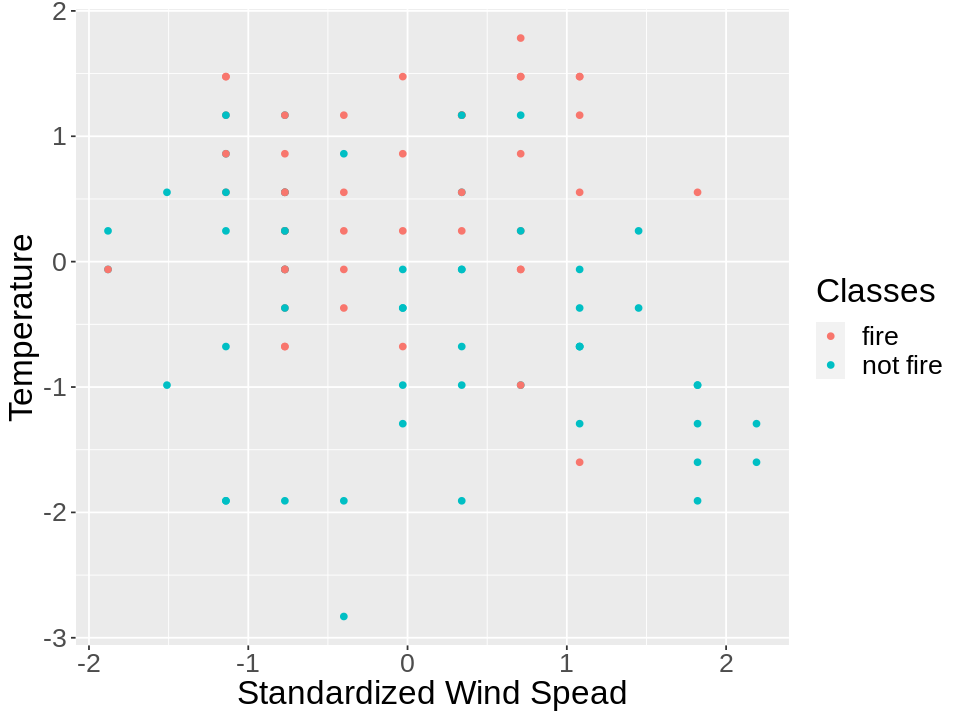

In [11]:
options(repr.plot.width = 8, repr.plot.height = 6)
b_RH_plot <- bejaia_scaled %>% 
             ggplot(aes(y=Temperature,x=RH, color=Classes)) + 
             geom_point() + 
             labs(y="Temperature", x="Standardized Relative Humidity", colour = "Classes")+
             theme(text = element_text(size = 20))
b_Ws_plot <- bejaia_scaled %>% 
             ggplot(aes(y=Temperature, x=Ws, color=Classes)) + 
             geom_point() + 
             labs(y="Temperature",x="Standardized Wind Spead", colour = "Classes") +
             theme(text = element_text(size = 20))
b_RH_plot 
b_Ws_plot

# Methods

- Explain how you will conduct either your data analysis and which variables/columns you will use. 
    
Using K-nearest neighbours classification, we will use the columns: RH (relative humidity), Ws (wind speed), Rain, and Temperature as predictors to determine the occurrence of a forest fire in Bejaia.  

- Describe at least one way that you will visualize the results
 
 We can visualize the results using a scatter plot. 
We will be using the K-nearest neighbour classification system to classify new observations as either "fire" or "no fire". A typical classification involves using numerical predictors to identify the class of a categorical variable. To do this, we first split the data set into a training set and a testing set. Then we further split the training set into a training set and a validation set so that we can tune our model and perform a 5-fold cross-validation to choose a K-value that gives the most accurate predictions. Additionally, we will scale and centre the data so that the average will be 0 and the standard deviation will be 1. In general, we calculate the Euclidean distance between the new observation and each observation in the training set, then we order them based on ascending distances, and finally, based on a majority vote, we classify the new observation to a class. We will do this for each predictor (wind speed, temperature, relative humidity, rain). 
We will visualize our results as a group of scatterplots, which will show the relationships between each variables. The visualization will be presented as a 4*4 plots and the point will be colored by classes.  


### The visualization

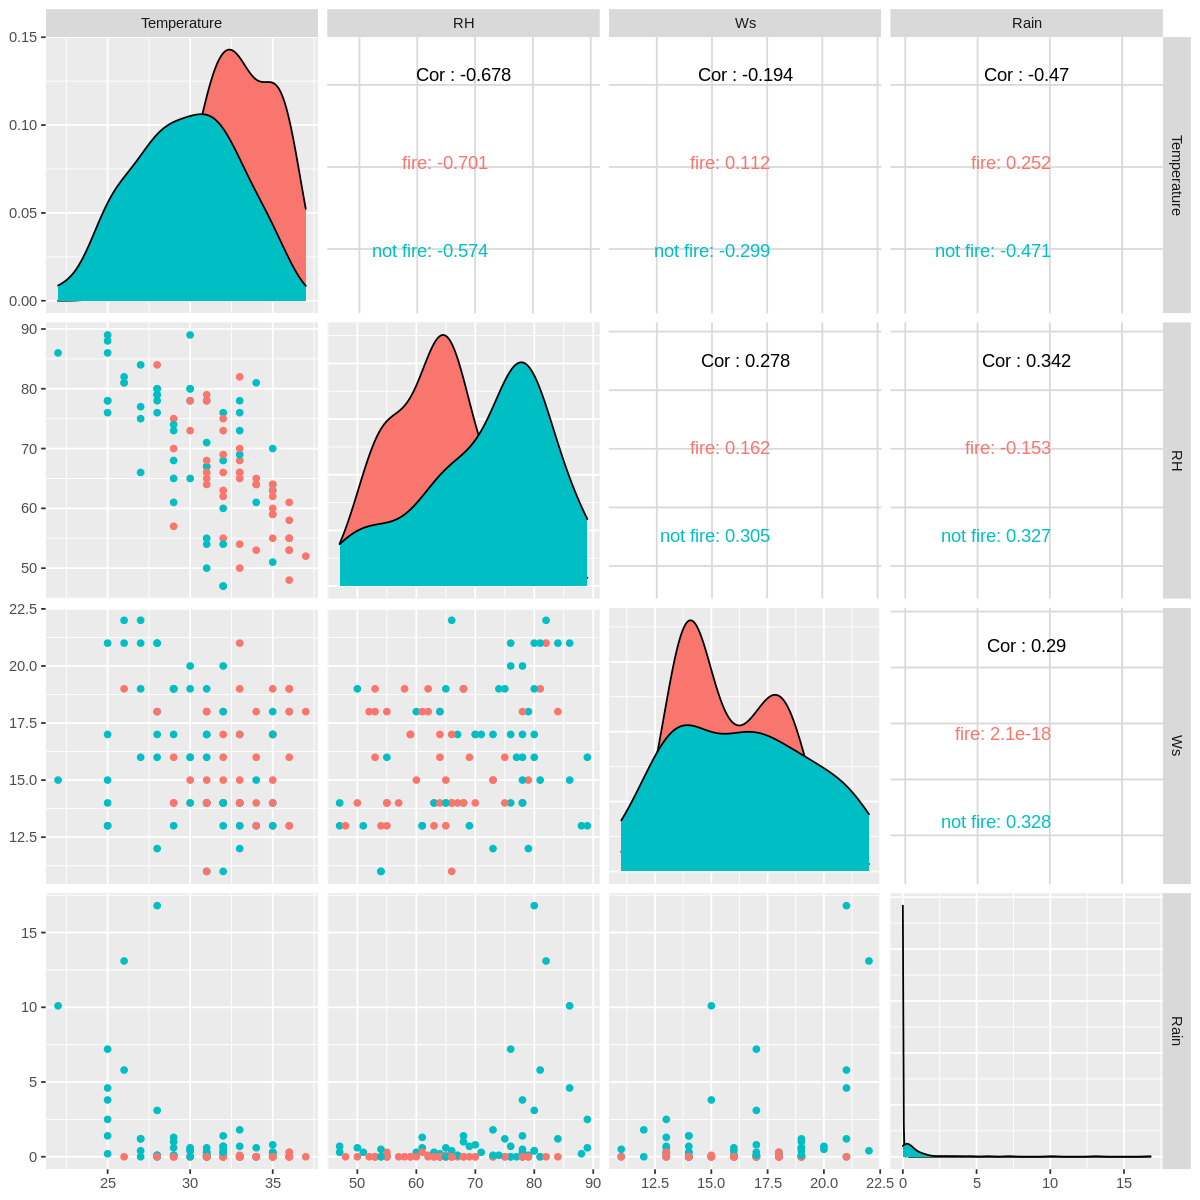

In [12]:
options(repr.plot.width = 10, repr.plot.height = 10)

pairs_bejaia <- bejaia_train %>%
                select(Temperature, RH, Ws, Rain) %>%
                ggpairs(ggplot2::aes(colour=bejaia_train$Classes)) 
pairs_bejaia

# Expected Outcomes and Significance

- What do you expect to find?

relative humidity: inversely proportional <br>
wind speed: proportional <br>
rain: inversely proportional <br>
temperature: proportional <br>

    
    
- What impact could such findings have?

Such findings could help us determine whether a future forest fire in Bejaia will happen or not. In this way, inhabitants could take the necessary precautions and measures to prevent fire propagation and preserve the environment. Indeed, if a forest fire is predicted and easily  detected, firefighters can reach the fire more quickly and put it out. Moreover, planting more shrubs around forests will be beneficial as they have low flammability and consumption rates, acting as fire deterrents. Hence, predicting the occurrence of a future forest fire in Bejaia will help in reducing pollution and protecting the environment.
    
- What future questions could this lead to?

After our analysis, we expect to find that as the temperature and wind speed increases and humidity and rain decreases, forest fires are more likely to occur. Since we are able to find how these factors relate to the occurrence of forest fires, they have predictive value. The significance of being able to decide which factors are able to accurately predict when a forest fire is likely to occur is important because then we can plan to mitigate the effects or prevent them altogether if we have a long enough warning. The results of our analysis leads to many unexplored questions; future analyses could focus on which specific weather conditions have the more significant impact on determining the occurrence of forest fires.
